<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/new_practice/find_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt


In [11]:
#이미지 읽어 들이고 크기 변경하기(*1)

img = cv2.imread("/content/drive/MyDrive/20210101_엽서우편번호/flower_2.jpg")
img = cv2.resize(img,(300, 169))


*2에서는 윤곽 검출을 하기위해서 이미지의 색공간을 흰색과 검은색의 두 가지로 통일하는 이진화 작업 진행. 이를 위해 일단 이미지를 그레이스케일로 변환하고 GaussianBlur()함수를 사용해 이미지를 블러 처리한다. 
>>
이렇게 하면 복잡하고 세부적인 모양이 뭉개지면서 이미지가 흐려진다.
실제로 이미지를 이진화하는 것은 threshold()함수이다.

In [12]:
#색공간 변경하기(*2) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

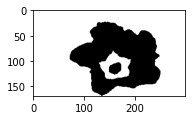

In [13]:
#화면 왼쪽에 변환한 이미지 출력하기(*3)
plt.subplot(1,2,1)
plt.imshow(im2, cmap="gray")

findContours()함수를 사용해 윤곽을 검출


In [14]:
#윤곽 검출하기(*4)
cnts = cv2.findContours(im2,
                        cv2.RETR_LIST,
                        cv2.CHAIN_APPROX_SIMPLE)[0]

윤곽검출후에 검출한 영역을 이미지에 그린다.
최종적으로 *6부분에서 *5에서 만든 이미지를 화면의 오른쪽에 출력한다.

129 80 63 56


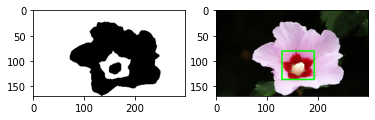

In [16]:
#검출한 윤곽 그리기(*5)
for pt in cnts:
  x, y, w, h = cv2.boundingRect(pt)
  #너무 크거나 너무 작은 부분 제거하기
  if w < 30 or w > 200 : continue
  print(x,y,w,h) #결과 출력하기
  cv2.rectangle(img, (x,y), (x+w, y+h),(0,255,0), 2)

#화면 오른쪽에 결과 출력하기(*6)
plt.subplot(1,2,1)
plt.imshow(im2, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()